GABRIEL SODRE DE MOURA 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_dir = 'C:/Users/Gabriel/Desktop/archive/skin-disease-datasaet/train_set'
test_dir = 'C:/Users/Gabriel/Desktop/archive/skin-disease-datasaet/test_set'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')


Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


In [9]:
NUM_CLASSES = 8
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=250,  
    validation_data=test_generator,
)

Epoch 1/250
29/29 [==============================] - 5s 170ms/step - loss: 2.0841 - accuracy: 0.1385 - val_loss: 1.9996 - val_accuracy: 0.2446
Epoch 2/250
29/29 [==============================] - 9s 319ms/step - loss: 1.9770 - accuracy: 0.2305 - val_loss: 1.9816 - val_accuracy: 0.2232
Epoch 3/250
29/29 [==============================] - 15s 515ms/step - loss: 1.9831 - accuracy: 0.2186 - val_loss: 1.8444 - val_accuracy: 0.3219
Epoch 4/250
29/29 [==============================] - 15s 524ms/step - loss: 1.9415 - accuracy: 0.2327 - val_loss: 1.8243 - val_accuracy: 0.3348
Epoch 5/250
29/29 [==============================] - 15s 523ms/step - loss: 1.8807 - accuracy: 0.2868 - val_loss: 1.6919 - val_accuracy: 0.3820
Epoch 6/250
29/29 [==============================] - 16s 545ms/step - loss: 1.7983 - accuracy: 0.3052 - val_loss: 1.5942 - val_accuracy: 0.4464
Epoch 7/250
29/29 [==============================] - 11s 349ms/step - loss: 1.6941 - accuracy: 0.3745 - val_loss: 1.4848 - val_accuracy: 0

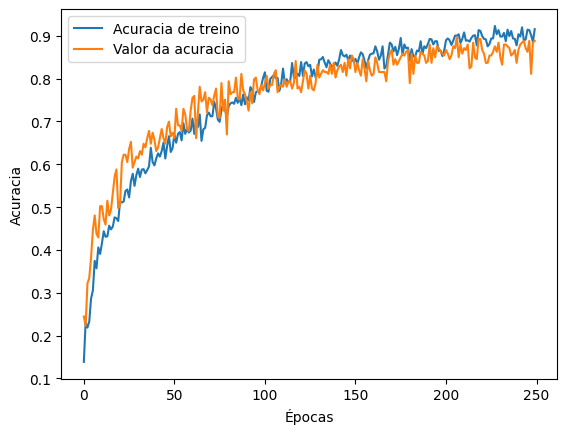

In [10]:
plt.plot(history.history['accuracy'], label='Acuracia de treino')
plt.plot(history.history['val_accuracy'], label='Valor da acuracia')
plt.xlabel('Épocas')
plt.ylabel('Acuracia')
plt.legend()
plt.show()

class_labels = ['BA-cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 
                'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']

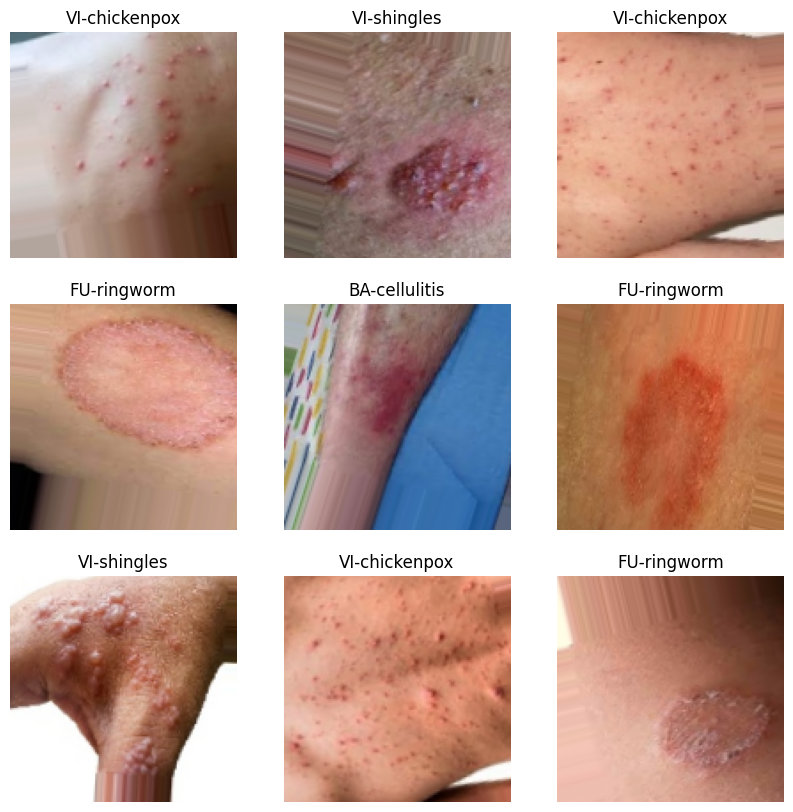

1/1 [==============================] - 0s 16ms/step


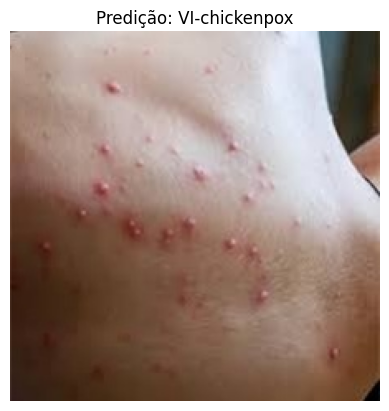

In [14]:
x_train_batch, y_train_batch = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train_batch[i])
    plt.axis('off')
    class_index = np.argmax(y_train_batch[i])
    plt.title(class_labels[class_index])
plt.show()

from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_path = 'C:/Users/Gabriel/Desktop/archive/skin-disease-datasaet/test_set/VI-chickenpox/40_VI-chickenpox (22).jpg'
image = load_img(image_path, target_size=(128, 128))
image_array = img_to_array(image)
image_array = image_array / 255.0  
image_array = np.expand_dims(image_array, axis=0)

predictions = model.predict(image_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]

plt.imshow(load_img(image_path))
plt.axis('off')
plt.title(f'Predição: {predicted_class_label}')
plt.show()